In [1]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import khepera3 as khep

In [4]:
def k3FuzzyAvoidDef():
    MaxProximitiSignal = 4096
    MaxSpeed = 20000
    left = ctrl.Antecedent(np.arange(0,MaxProximitiSignal,1), 'left')
    front = ctrl.Antecedent(np.arange(0,MaxProximitiSignal,1), 'front')
    right = ctrl.Antecedent(np.arange(0,MaxProximitiSignal,1), 'right')
    vl = ctrl.Consequent(np.arange(0,MaxSpeed,1), 'v1')
    vr = ctrl.Consequent(np.arange(0,MaxSpeed,1), 'v2')
    
    left['S'] = fuzz.trimf(left.universe, [0, 0, MaxProximitiSignal])
    left['B'] = fuzz.trimf(left.universe, [0, MaxProximitiSignal, MaxProximitiSignal])

    front['S'] =fuzz.trimf(left.universe, [0, 0, MaxProximitiSignal])
    front['B'] =fuzz.trimf(left.universe, [0, MaxProximitiSignal, MaxProximitiSignal])

    right['S'] =fuzz.trimf(left.universe, [0, 0, MaxProximitiSignal])
    right['B'] =fuzz.trimf(left.universe, [0, MaxProximitiSignal, MaxProximitiSignal])

    vl['back'] = fuzz.trimf(left.universe, [-MaxSpeed, -MaxSpeed, 0])
    vl['front'] = fuzz.trimf(left.universe, [0,MaxSpeed, MaxSpeed])

    vr['back'] = fuzz.trimf(left.universe, [-MaxSpeed, -MaxSpeed, 0])
    vr['front'] = fuzz.trimf(left.universe, [0,MaxSpeed, MaxSpeed])

    # rules definition
    # Rule in a fuzzy control system, connecting antecedent(s) to consequent(s)
    rule1 =ctrl.Rule(antecedent=(left['S'] & front['S'] & right['S']),consequent=(vl['front'], vr['front']) 
    rule2 =ctrl.Rule(antecedent=(left['S'] & front['S'] & right['B']),consequent=(vl['back'], vr['front']) )
    rule3 =ctrl.Rule(antecedent=(left['S'] & front['B'] & right['S']),consequent=(vl['back'], vr['front']) )
    rule4 =ctrl.Rule(antecedent=(left['S'] & front['B'] & right['B']),consequent=(vl['back'], vr['front']) )
    rule5 =ctrl.Rule(antecedent=(left['B'] & front['S'] & right['S']),consequent=(vl['front'], vr['back']) )
    rule6 =ctrl.Rule(antecedent=(left['B'] & front['B'] & right['S']),consequent=(vl['front'], vr['back']) )
    rule7 =ctrl.Rule(antecedent=(left['B'] & front['S'] & right['B']),consequent=(vl['front'], vr['front']) 
    rule8 =ctrl.Rule(antecedent=(left['B'] & front['B'] & right['B']),consequent=(vl['back'], vr['front']) )
    
    # The system is initialized and populated with a set of fuzzy Rules
    avoid_ctr = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8])
    # Calculate results from a ControlSystem
    avoid_sym = ctrl.ControlSystemSimulation(avoid_ctr)
    return avoid_sym
    
def k3FuzzyAvoidEval(avoid_sym, val_left, val_front, val_right):
    # Compute the fuzzy system
    avoid_sym.input['left'] = val_left
    avoid_sym.input['front'] = val_front
    avoid_sym.input['right'] = val_right
    avoid_sym.compute()
    # print('vl=',avoid_sym.output['vl'], ' vr=',avoid_sym.output['vr'])
    return avoid_sym


def k3FuzzyAvoidLoop(s):
    avoid_sym = khep.k3FuzzyAvoidDef() # do przygotowania w II części laboratorium
    res = False
    iter = 0
    while iter <= 1000:
        sens = khep.k3ReadProximitySensors(s)
        # print(sens)
        val_left = max(sens[1],sens[2])
        val_front = max(sens[3],sens[4])
        val_right = max(sens[5],sens[6])
        avoid_sym = k3FuzzyAvoidEval(avoid_sym, val_left, val_front, val_right)
        khep.k3SetSpeed(s,avoid_sym.output['vl'],avoid_sym.output['vr'])
    iter += 1

c:\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<skfuzzy.control.controlsystem.ControlSystemSimulation at 0x23117e72450>,
 Consequent: v1,
 Consequent: v2)

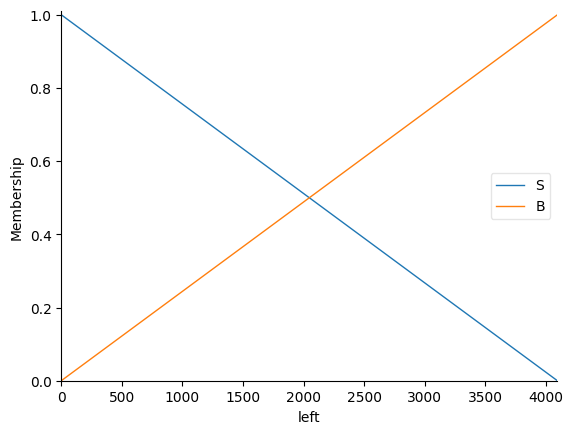

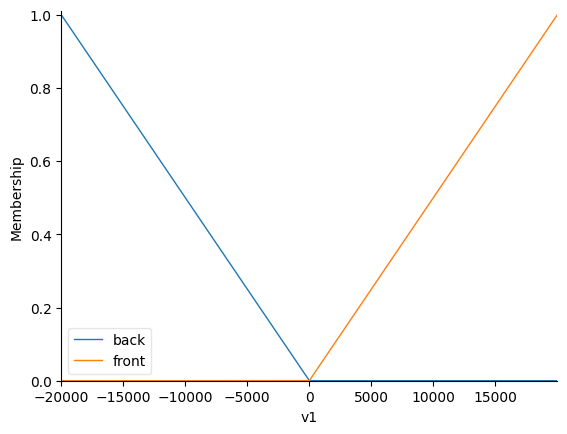

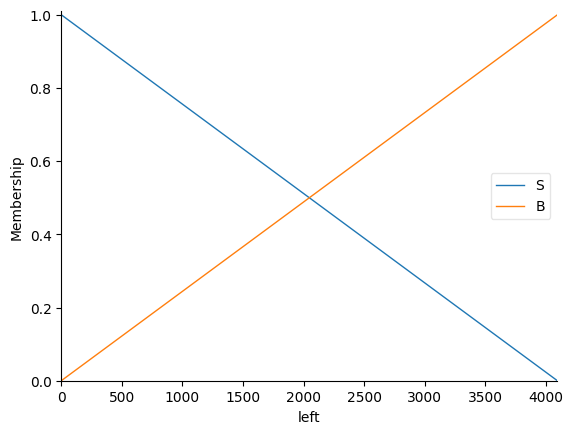

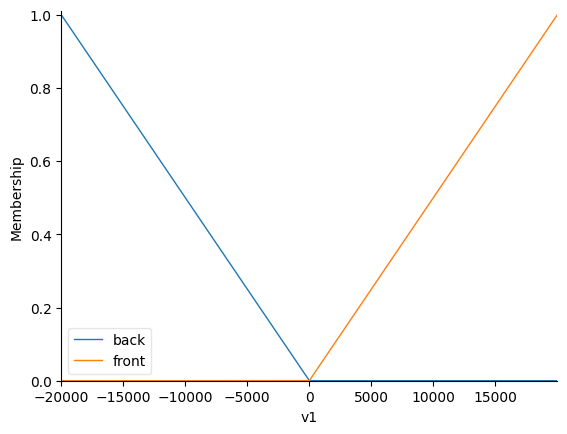

In [8]:
def k3FuzzyAvoidDef():
    MaxProximitiSignal = 4096
    MaxSpeed = 20000
    left = ctrl.Antecedent(np.arange(0,MaxProximitiSignal,1), 'left')
    front = ctrl.Antecedent(np.arange(0,MaxProximitiSignal,1), 'front')
    right = ctrl.Antecedent(np.arange(0,MaxProximitiSignal,1), 'right')
    vl = ctrl.Consequent(np.arange(-MaxSpeed,MaxSpeed,1), 'v1')
    vr = ctrl.Consequent(np.arange(-MaxSpeed,MaxSpeed,1), 'v2')
    


    left['S'] = fuzz.trimf(left.universe, [0, 0, MaxProximitiSignal])
    left['B'] = fuzz.trimf(left.universe, [0, MaxProximitiSignal, MaxProximitiSignal])

    front['S'] =fuzz.trimf(front.universe, [0, 0, MaxProximitiSignal])
    front['B'] =fuzz.trimf(front.universe, [0, MaxProximitiSignal, MaxProximitiSignal])

    right['S'] =fuzz.trimf(right.universe, [0, 0, MaxProximitiSignal])
    right['B'] =fuzz.trimf(right.universe, [0, MaxProximitiSignal, MaxProximitiSignal])

    vl['back'] = fuzz.trimf(vl.universe, [-MaxSpeed, -MaxSpeed, 0])
    vl['front'] = fuzz.trimf(vl.universe, [0, MaxSpeed, MaxSpeed])

    vr['back'] = fuzz.trimf(vr.universe, [-MaxSpeed, -MaxSpeed, 0])
    vr['front'] = fuzz.trimf(vr.universe, [0,MaxSpeed, MaxSpeed])
    
    left.view()
    vl.view()


    # rules definition
    # Rule in a fuzzy control system, connecting antecedent(s) to consequent(s)
    rule1 =ctrl.Rule(antecedent=(left['S'] & front['S'] & right['S']),consequent=(vl['front'], vr['front']) )
    rule2 =ctrl.Rule(antecedent=(left['S'] & front['S'] & right['B']),consequent=(vl['back'], vr['front']) )
    rule3 =ctrl.Rule(antecedent=(left['S'] & front['B'] & right['S']),consequent=(vl['back'], vr['front']) )
    rule4 =ctrl.Rule(antecedent=(left['S'] & front['B'] & right['B']),consequent=(vl['back'], vr['front']) )
    rule5 =ctrl.Rule(antecedent=(left['B'] & front['S'] & right['S']),consequent=(vl['front'], vr['back']) )
    rule6 =ctrl.Rule(antecedent=(left['B'] & front['B'] & right['S']),consequent=(vl['front'], vr['back']) )
    rule7 =ctrl.Rule(antecedent=(left['B'] & front['S'] & right['B']),consequent=(vl['front'], vr['front']) )
    rule8 =ctrl.Rule(antecedent=(left['B'] & front['B'] & right['B']),consequent=(vl['back'], vr['front']) )
    
    avoid_ctr = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8]) 
    avoid_sym = ctrl.ControlSystemSimulation(avoid_ctr)
    
    return avoid_sym ,vl, vr
    
avoid_sym,vl, vr = k3FuzzyAvoidDef()
k3FuzzyAvoidDef()


# n_points = 100
# upsampled = np.linspace(0, 4000, n_points)
# x, y = np.meshgrid(upsampled, upsampled)
# z = np.zeros_like(x)

# for i in range(n_points):
#     for j in range(n_points):
#         avoid_sym.input['front'] = x[i, j]
#         avoid_sym.input['right'] = y[i, j]
#         avoid_sym.compute()
#         z[i, j] = avoid_sym.output['CC']

# avoid_sym.input['left'] = 


# avoid_sym.input['front'] = 5
# avoid_sym.input['right'] = 5
# avoid_sym.input['left'] = 0
# x=avoid_sym.compute()

# print('lewe koło ',avoid_sym.output['vl'])
# print('prawe koło',avoid_sym.output['vr'])


# vl.view(sim=avoid_sym)
